In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./cmi-detect-behavior-with-sensor-data/train.csv')
print(train.shape)

(574945, 341)


Sequence length statistics
count    8151.000000
mean       70.536744
std        35.389879
min        29.000000
25%        51.000000
50%        59.000000
75%        78.000000
max       700.000000
dtype: float64

Sample sequence lengths
sequence_id
SEQ_000007     57
SEQ_000008     68
SEQ_000013     53
SEQ_000016     61
SEQ_000018     54
SEQ_000022    159
SEQ_000033     56
SEQ_000034     40
SEQ_000046     78
SEQ_000053     50
SEQ_000058     54
SEQ_000063     88
SEQ_000079     67
SEQ_000091     61
SEQ_000092     54
SEQ_000111     55
SEQ_000113     81
SEQ_000114     87
SEQ_000142     73
SEQ_000150     80
SEQ_000166     46
SEQ_000169     81
SEQ_000174    234
SEQ_000182     45
SEQ_000210    161
SEQ_000220     73
SEQ_000237     61
SEQ_000239     86
SEQ_000240     50
SEQ_000245     77
SEQ_000250     53
SEQ_000255     77
SEQ_000259     54
SEQ_000266     55
SEQ_000281     55
SEQ_000284     45
SEQ_000297     50
SEQ_000313     65
SEQ_000320     57
SEQ_000322    169
SEQ_000323     83
SEQ_000326     

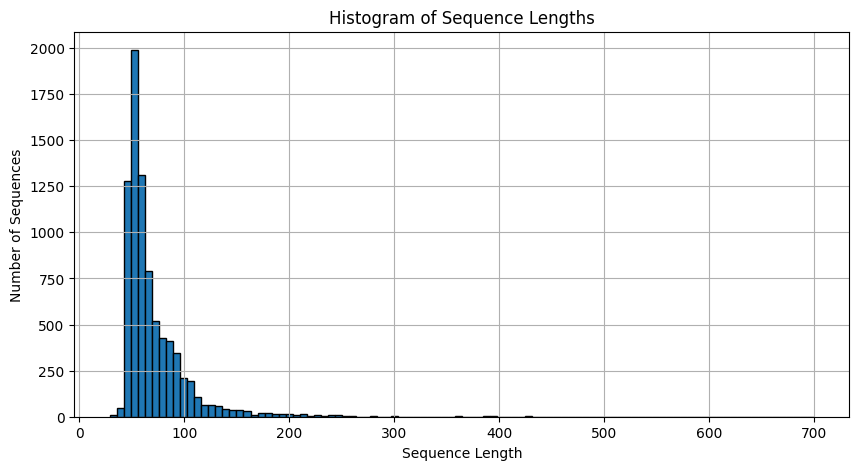

In [3]:
# Calculate sequence lengths
seq_lengths = train.groupby('sequence_id').size()

# Print basic statistics
print("Sequence length statistics")
print(seq_lengths.describe())

# Print sequence lengths
print("\nSample sequence lengths")
print(seq_lengths.to_string())

# Plot histogram of sequence lengths
plt.figure(figsize=(10, 5))
plt.hist(seq_lengths, bins=100, edgecolor='black')
plt.title("Histogram of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Number of Sequences")
plt.grid(True)
plt.show()


<Axes: ylabel='gesture'>

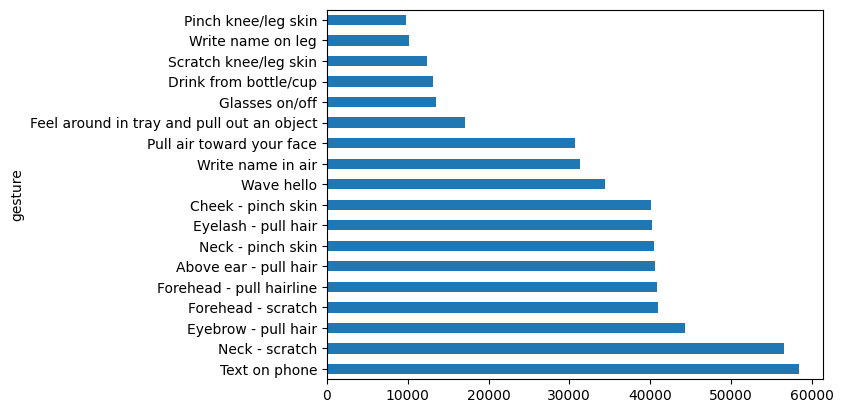

In [5]:
train['gesture'].value_counts().plot(kind='barh')

In [6]:
missing_ratio = train.isnull().mean().sort_values(ascending=False)
missing_ratio[missing_ratio > 0]

thm_5        0.057894
tof_5_v63    0.052426
tof_5_v24    0.052426
tof_5_v19    0.052426
tof_5_v20    0.052426
               ...   
tof_2_v37    0.010825
rot_y        0.006421
rot_x        0.006421
rot_w        0.006421
rot_z        0.006421
Length: 329, dtype: float64

# IMU(Movement)

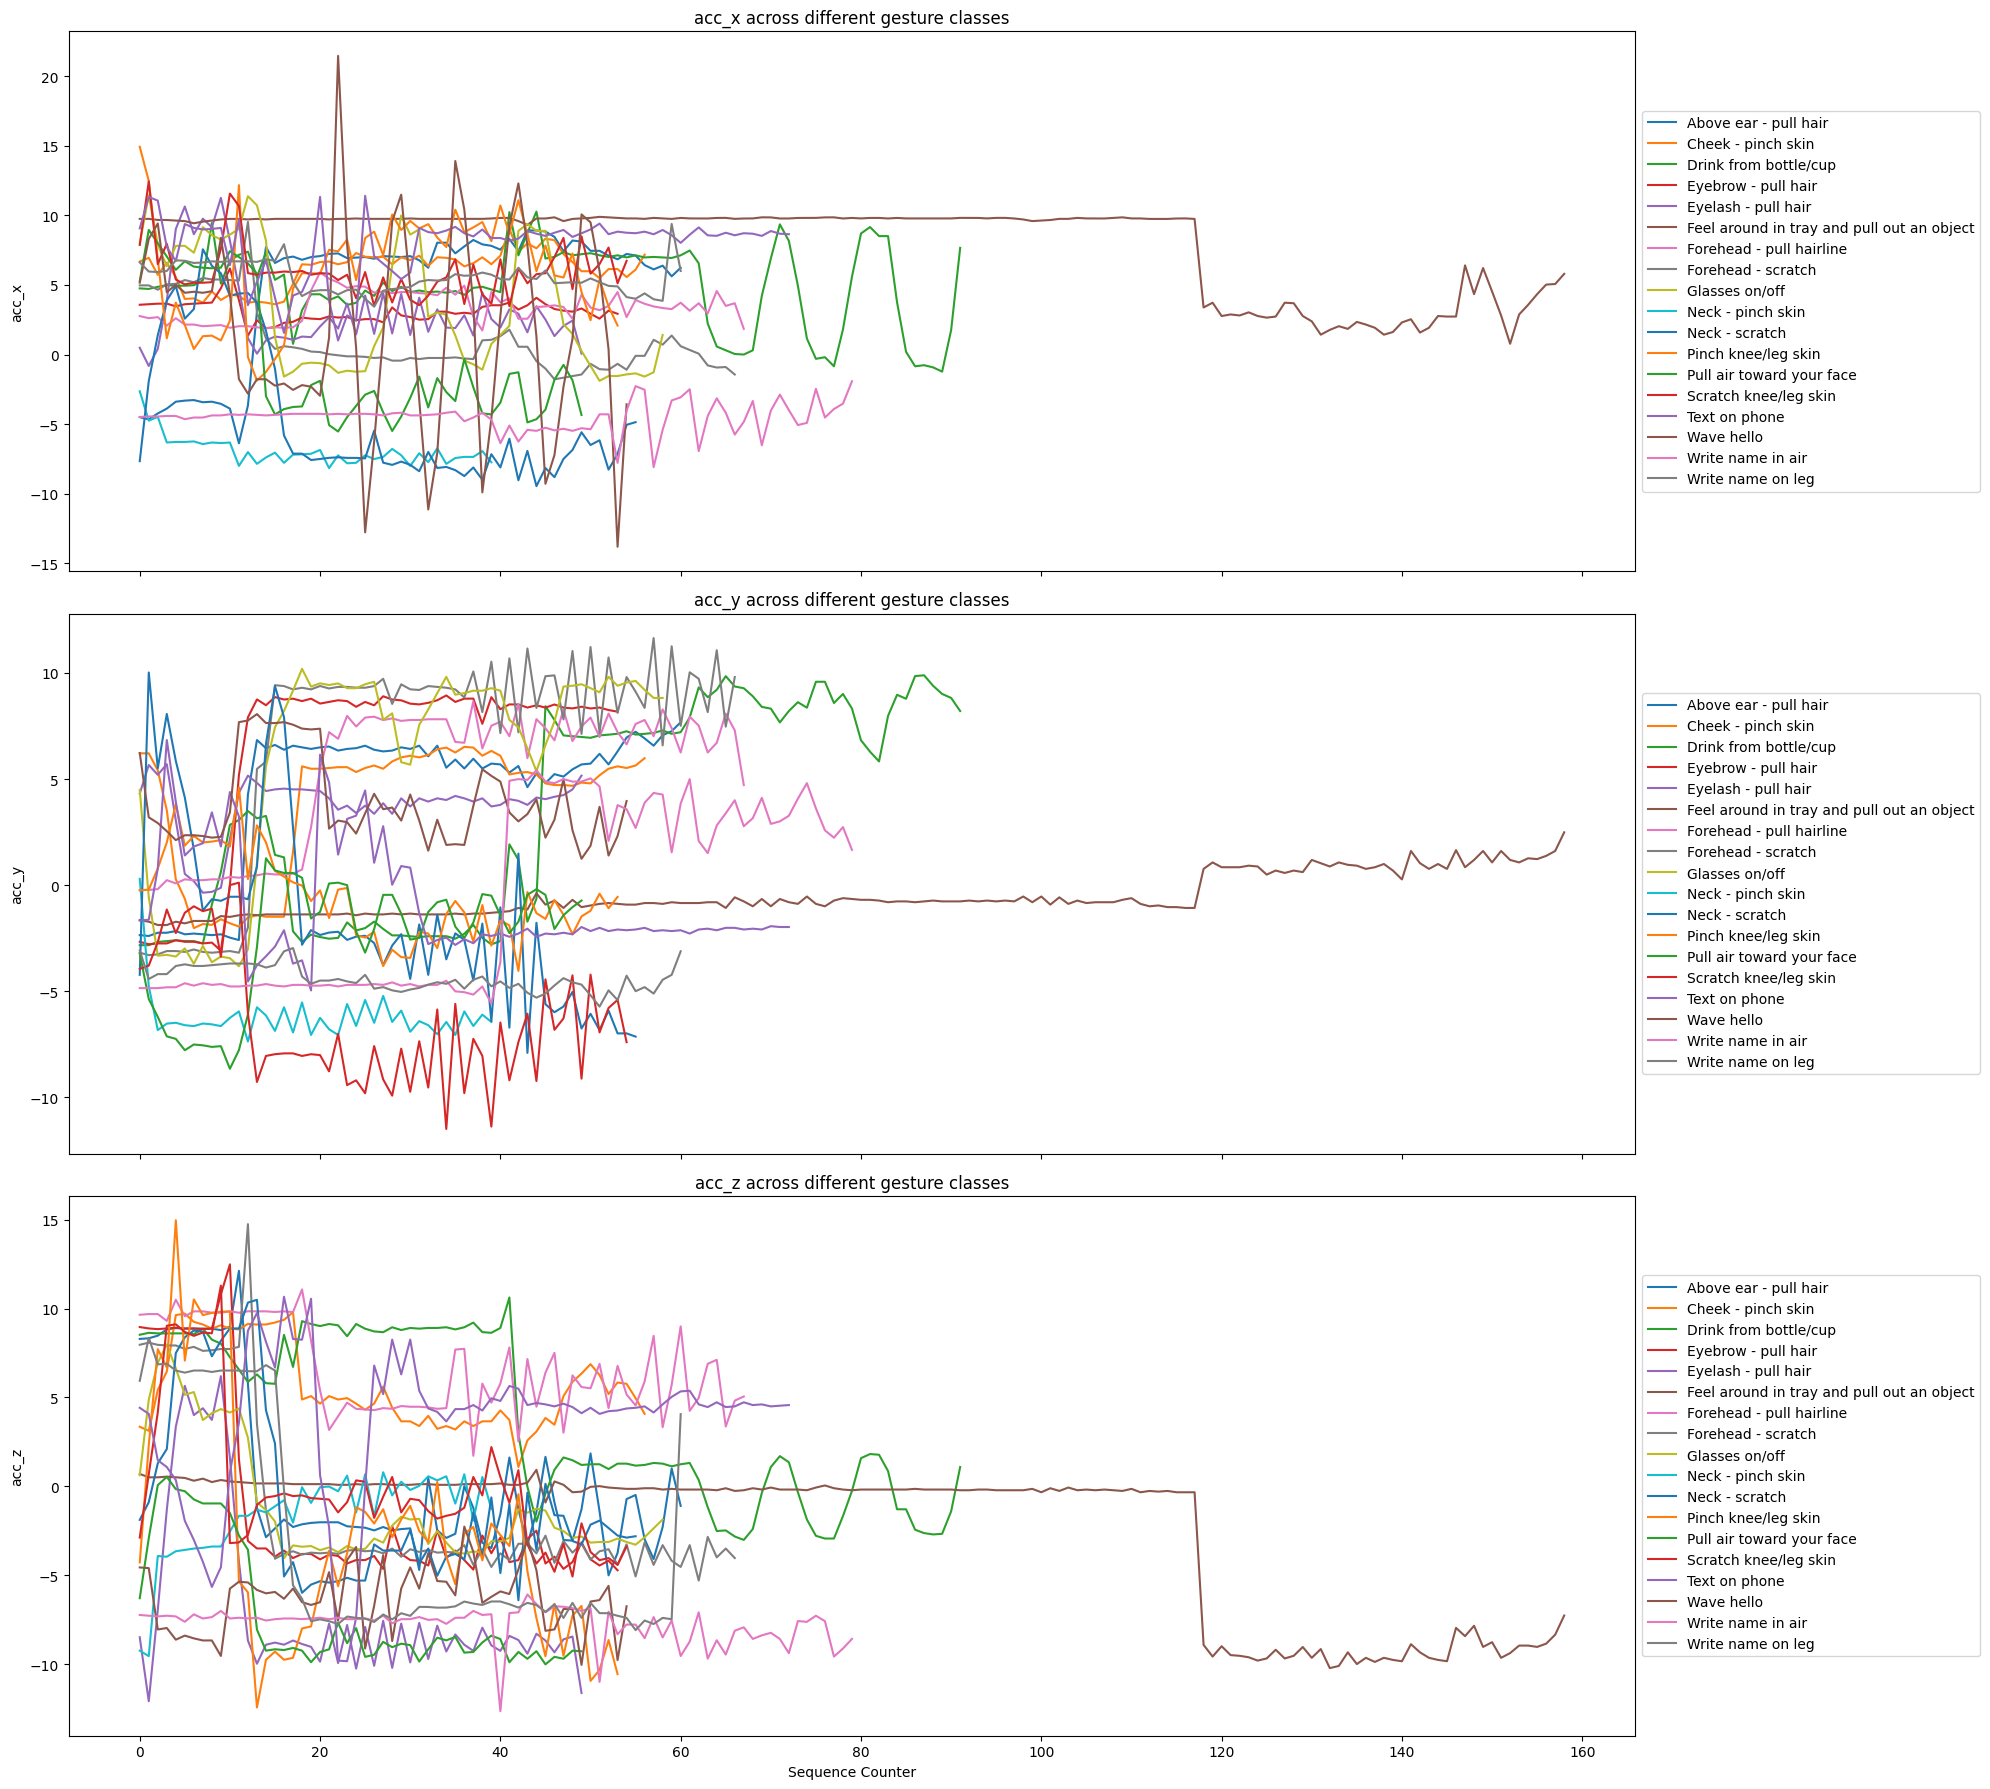

In [7]:
# Features to visualize
acc_features = ['acc_x', 'acc_y', 'acc_z']

# Select one sequence_id per gesture class
sample_seq_per_class = (
    train[['sequence_id', 'gesture']]
    .drop_duplicates()
    .groupby('gesture')
    .first()
    .reset_index()
)

# Prepare list of selected sequence IDs and mapping to gesture
sample_ids = sample_seq_per_class['sequence_id'].tolist()
gesture_map = dict(zip(sample_seq_per_class['sequence_id'], sample_seq_per_class['gesture']))

# Create subplots for each accelerometer feature
fig, axes = plt.subplots(len(acc_features), 1, figsize=(20, 6 * len(acc_features)), sharex=True)

for i, feature in enumerate(acc_features):
    ax = axes[i]
    for seq_id in sample_ids:
        sample_seq = train[train['sequence_id'] == seq_id]
        gesture = gesture_map.get(seq_id, "Unknown")
        label = f'{gesture}'
        sns.lineplot(data=sample_seq, x='sequence_counter', y=feature, label=label, ax=ax)
    ax.set_title(f'{feature} across different gesture classes')
    ax.set_ylabel(feature)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[-1].set_xlabel('Sequence Counter')
plt.tight_layout()
plt.show()

# IMU(Rotation)

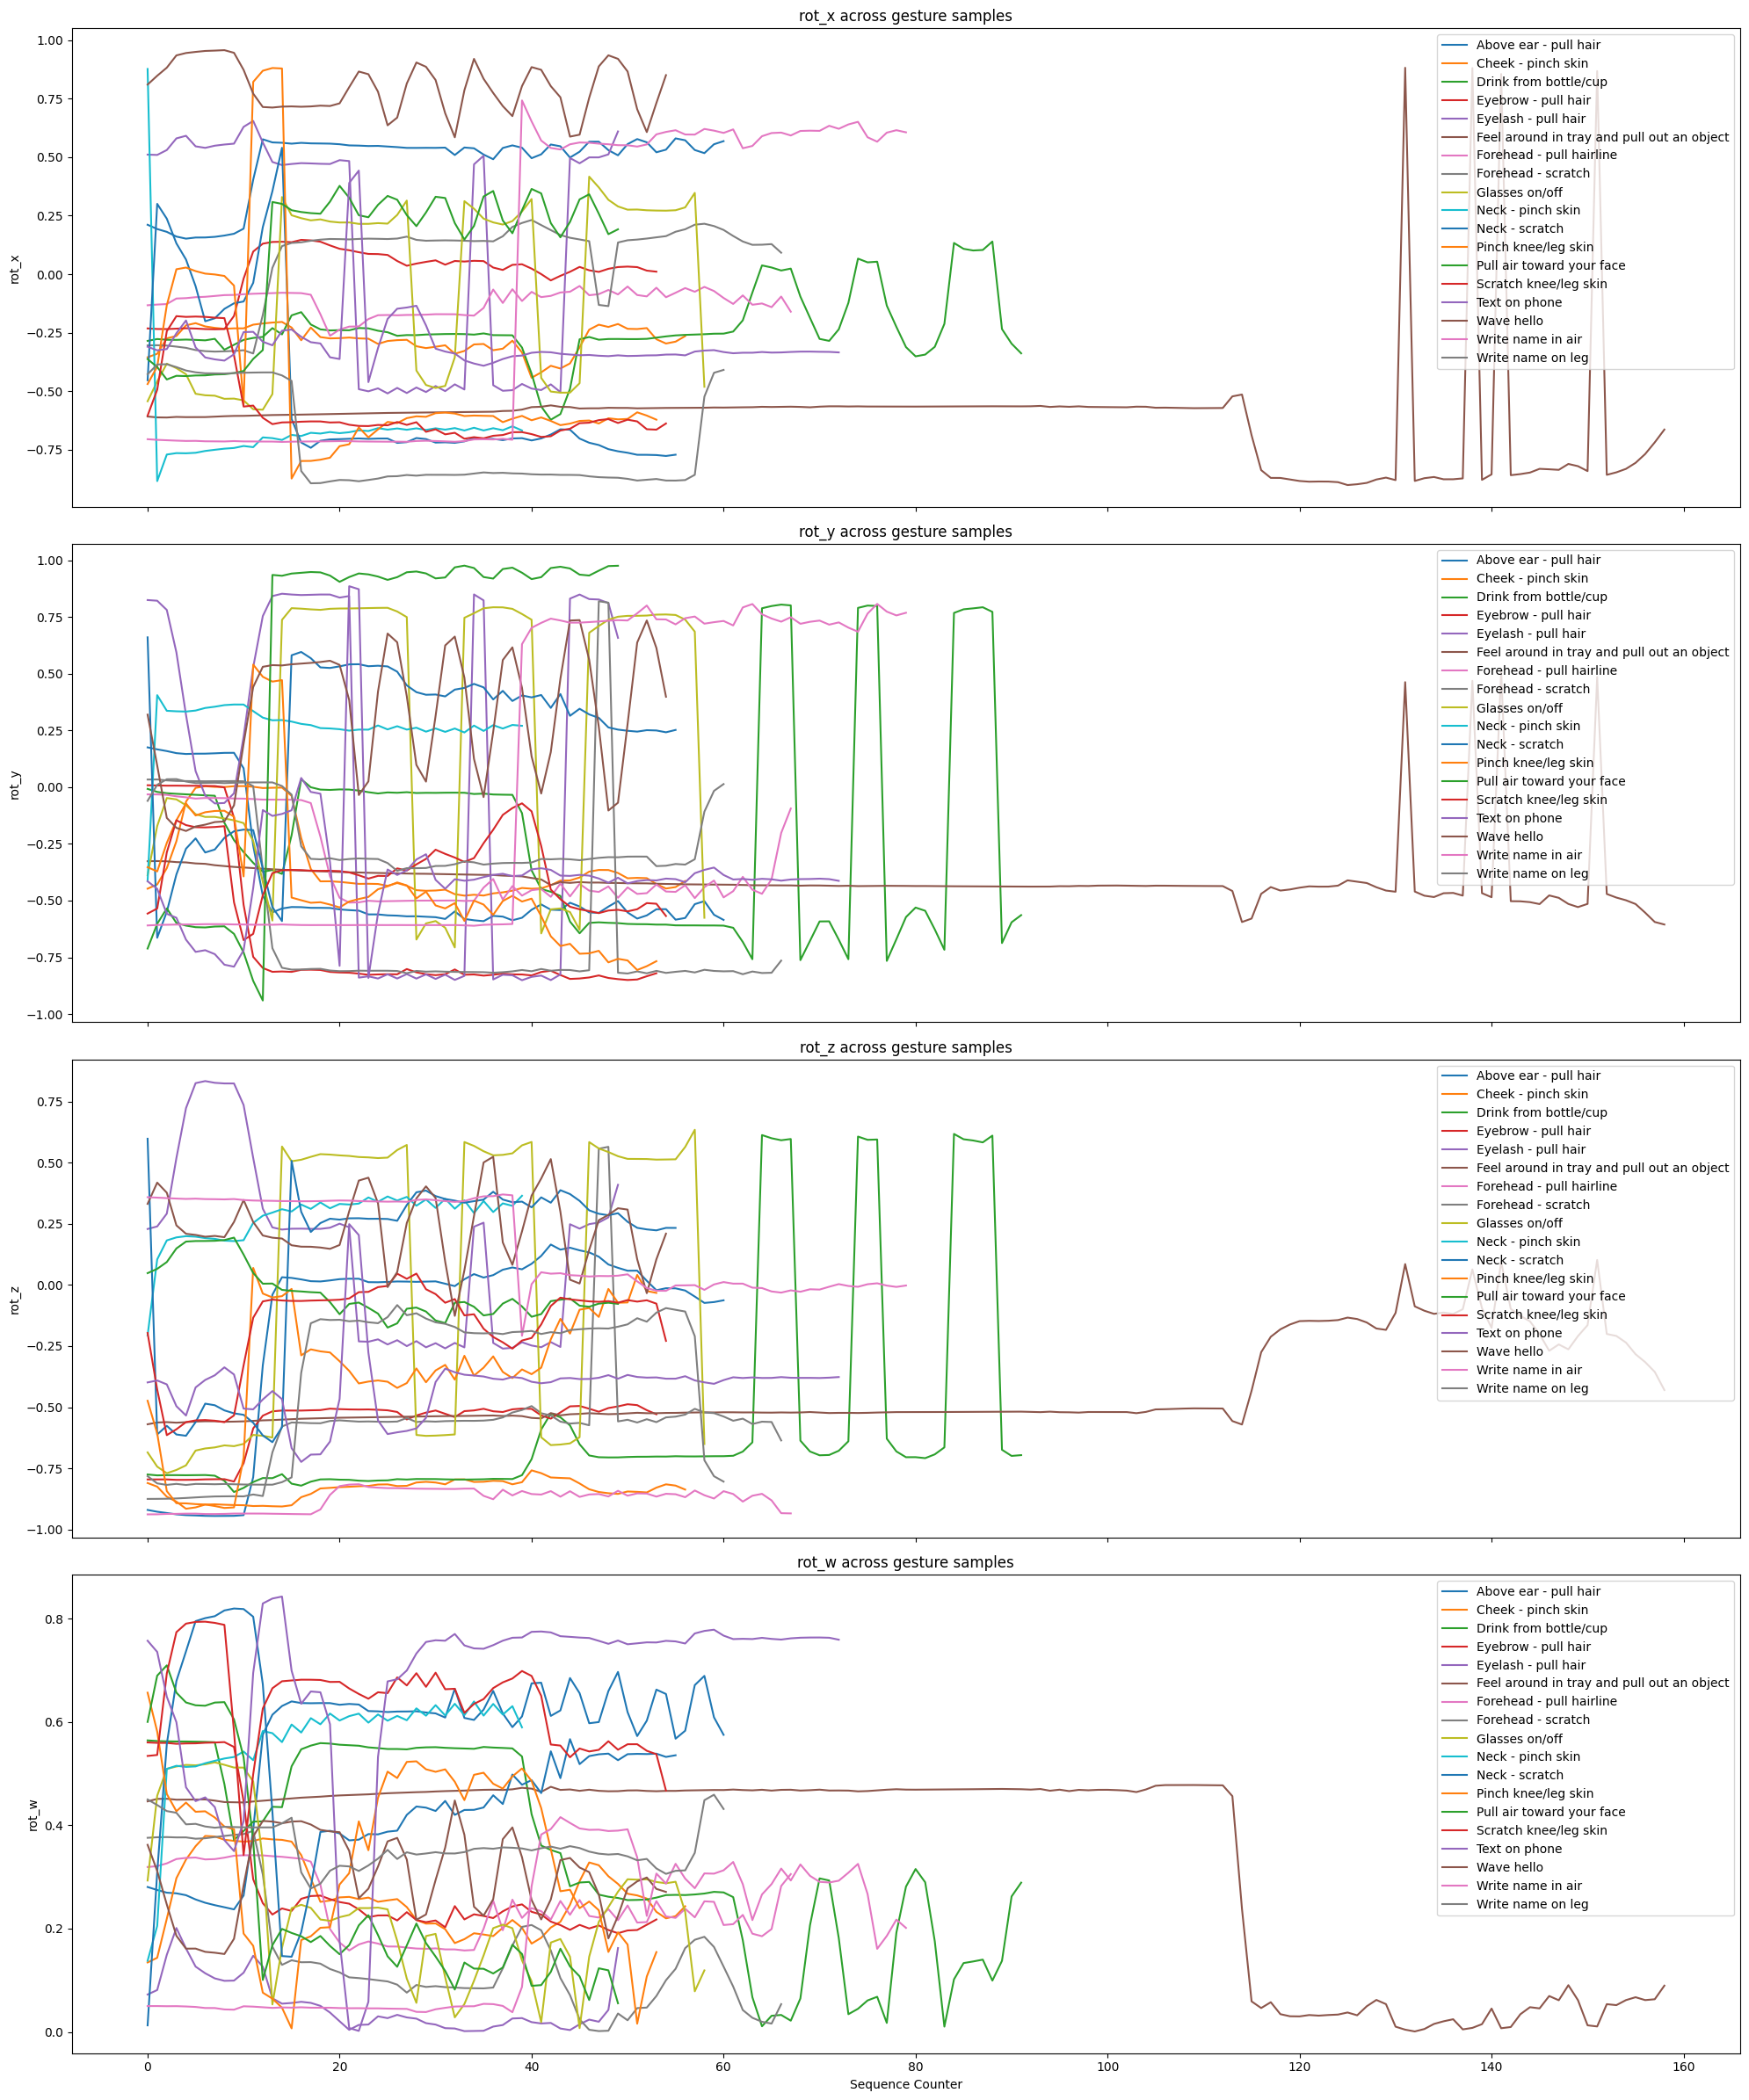

In [8]:
# Rotation sensor features
rot_features = ['rot_x', 'rot_y', 'rot_z', 'rot_w']

# Select one representative sequence_id per gesture
gesture_ids = train.groupby('gesture')['sequence_id'].first()

# Create subplots for each rotation feature
fig, axes = plt.subplots(len(rot_features), 1, figsize=(20, 6 * len(rot_features)), sharex=True)

for i, feature in enumerate(rot_features):
    ax = axes[i]
    for gesture, seq_id in gesture_ids.items():
        seq_data = train[train['sequence_id'] == seq_id]
        sns.lineplot(data=seq_data, x='sequence_counter', y=feature, label=gesture, ax=ax)
    ax.set_title(f'{feature} across gesture samples')
    ax.set_ylabel(feature)
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Sequence Counter')
plt.tight_layout()
plt.show()


# Thermopile

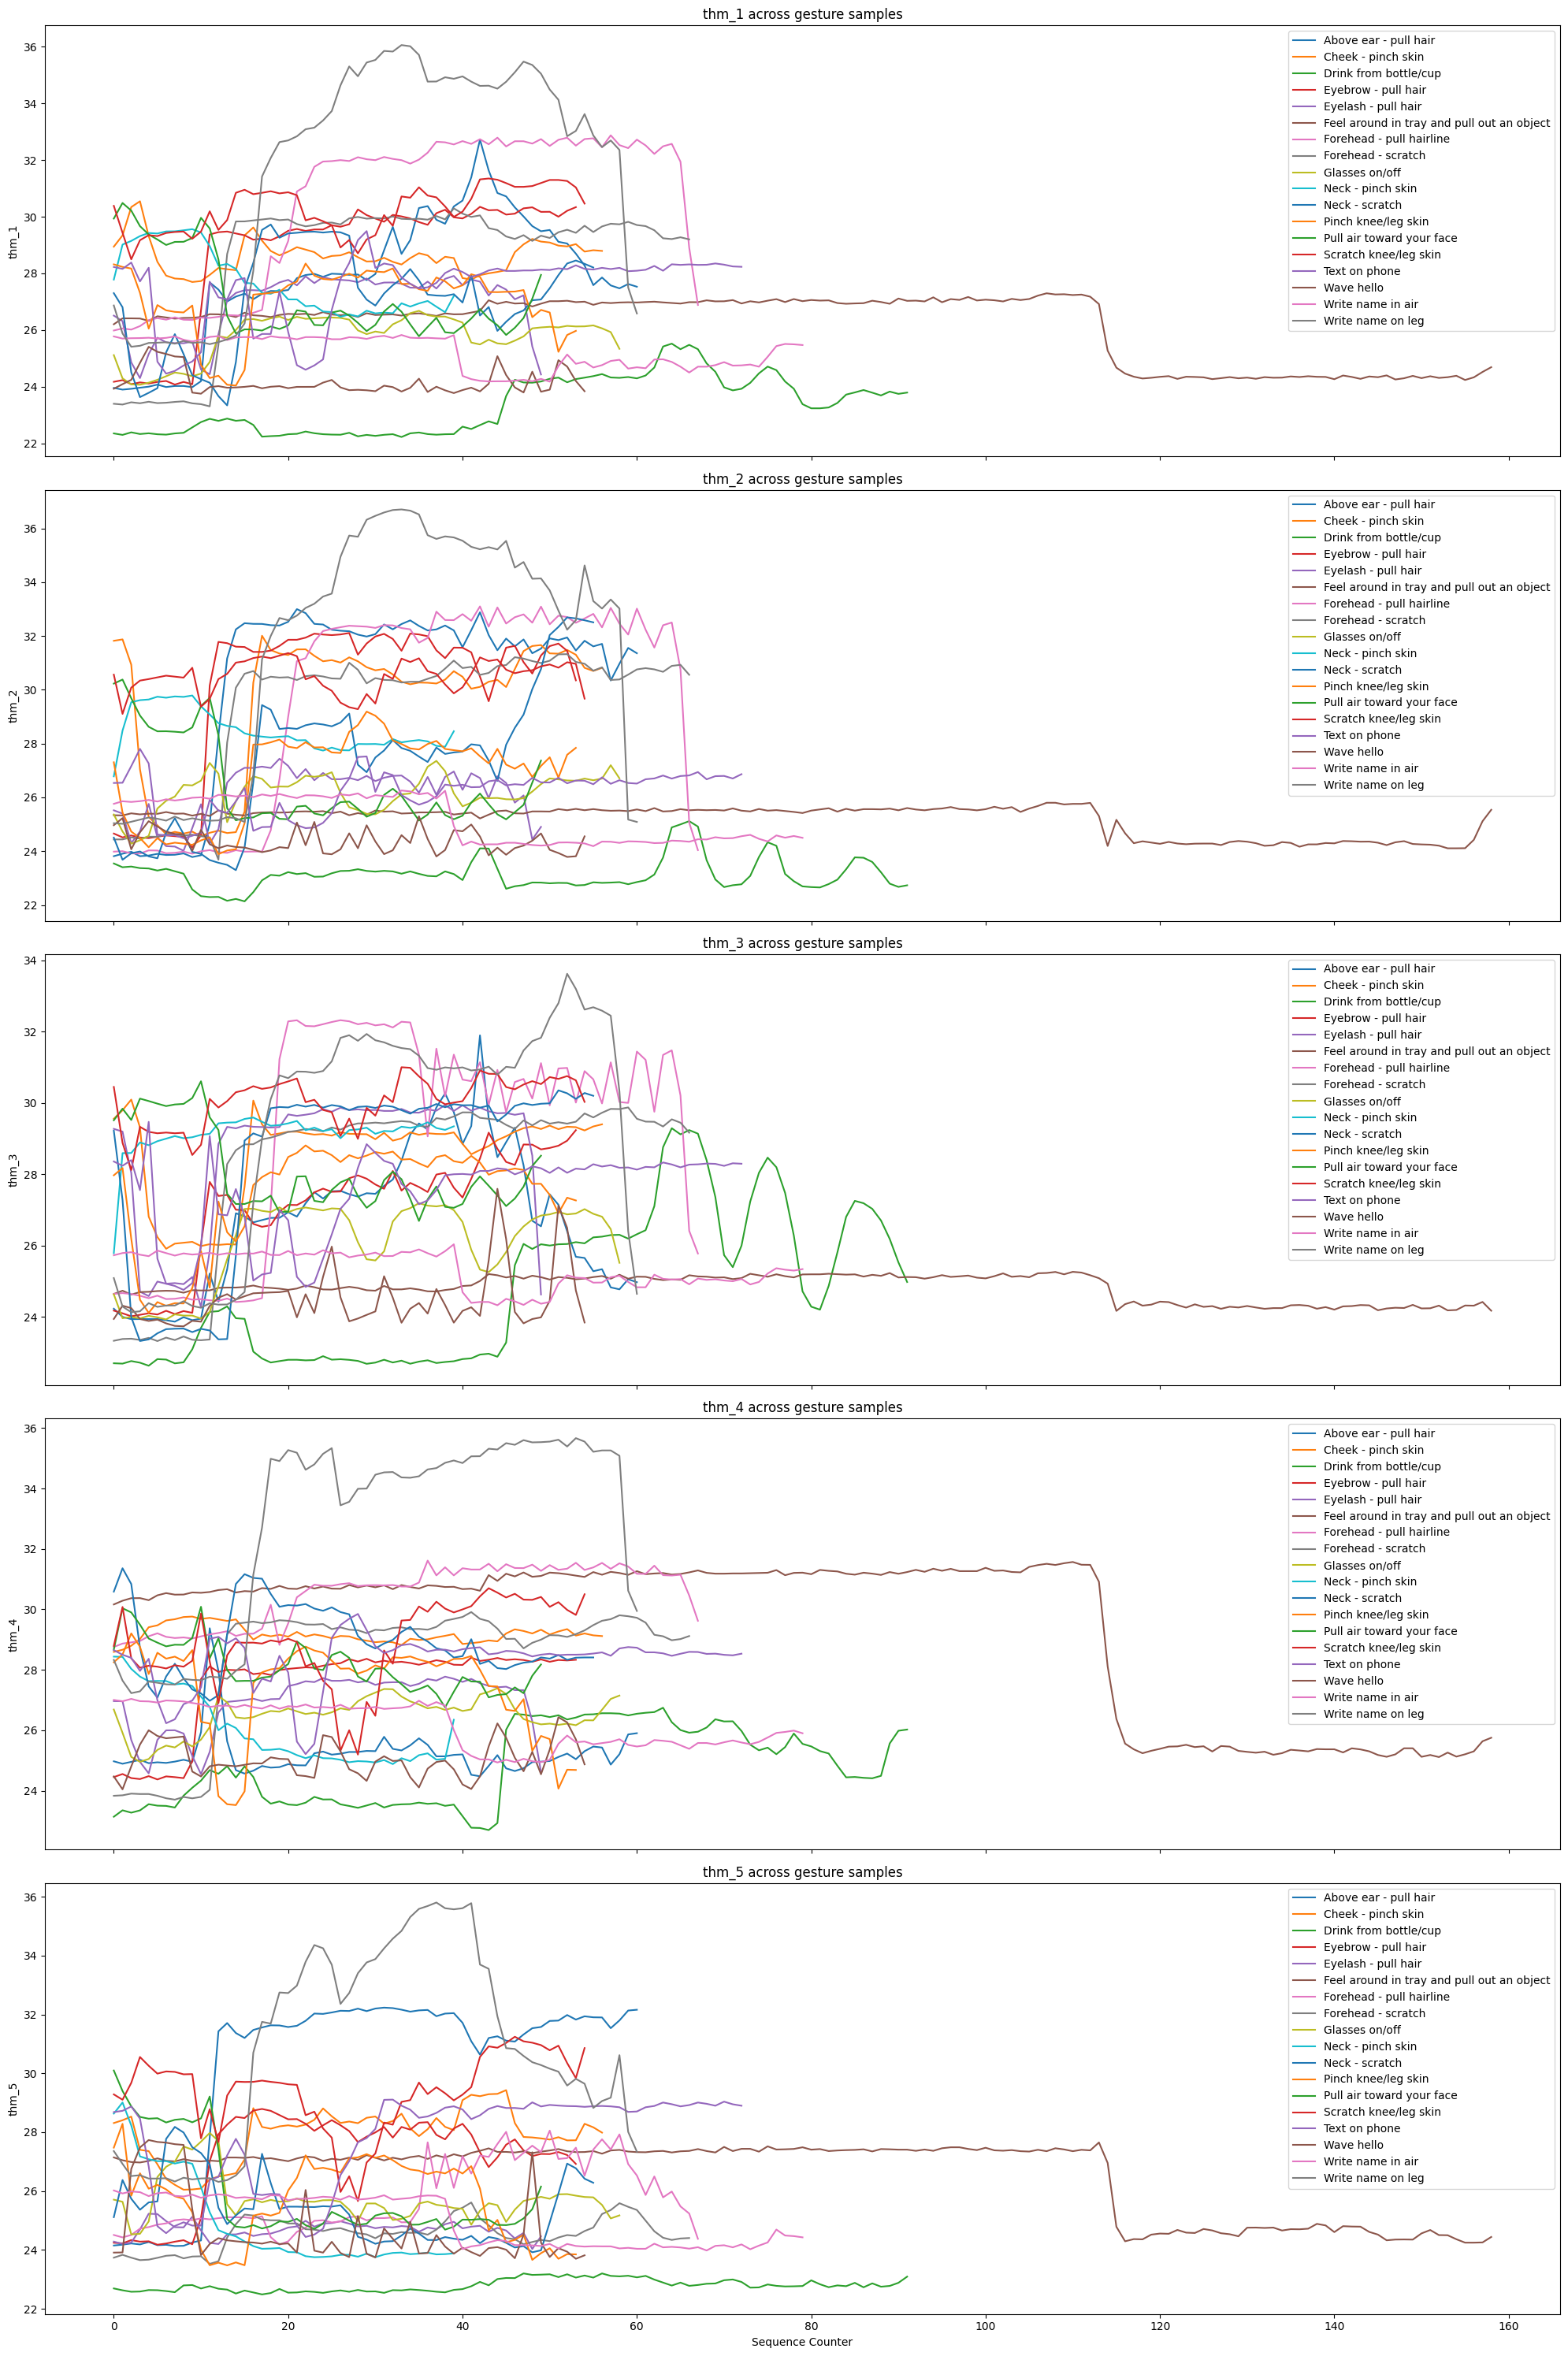

In [9]:
# Temperature sensor features
thm_features = ['thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

# Create subplots for each temperature feature
fig, axes = plt.subplots(len(thm_features), 1, figsize=(20, 6 * len(thm_features)), sharex=True)

for i, feature in enumerate(thm_features):
    ax = axes[i]
    for gesture, seq_id in gesture_ids.items():
        seq_data = train[train['sequence_id'] == seq_id]
        sns.lineplot(data=seq_data, x='sequence_counter', y=feature, label=gesture, ax=ax)
    ax.set_title(f'{feature} across gesture samples')
    ax.set_ylabel(feature)
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Sequence Counter')
plt.tight_layout()
plt.show()


# ToF

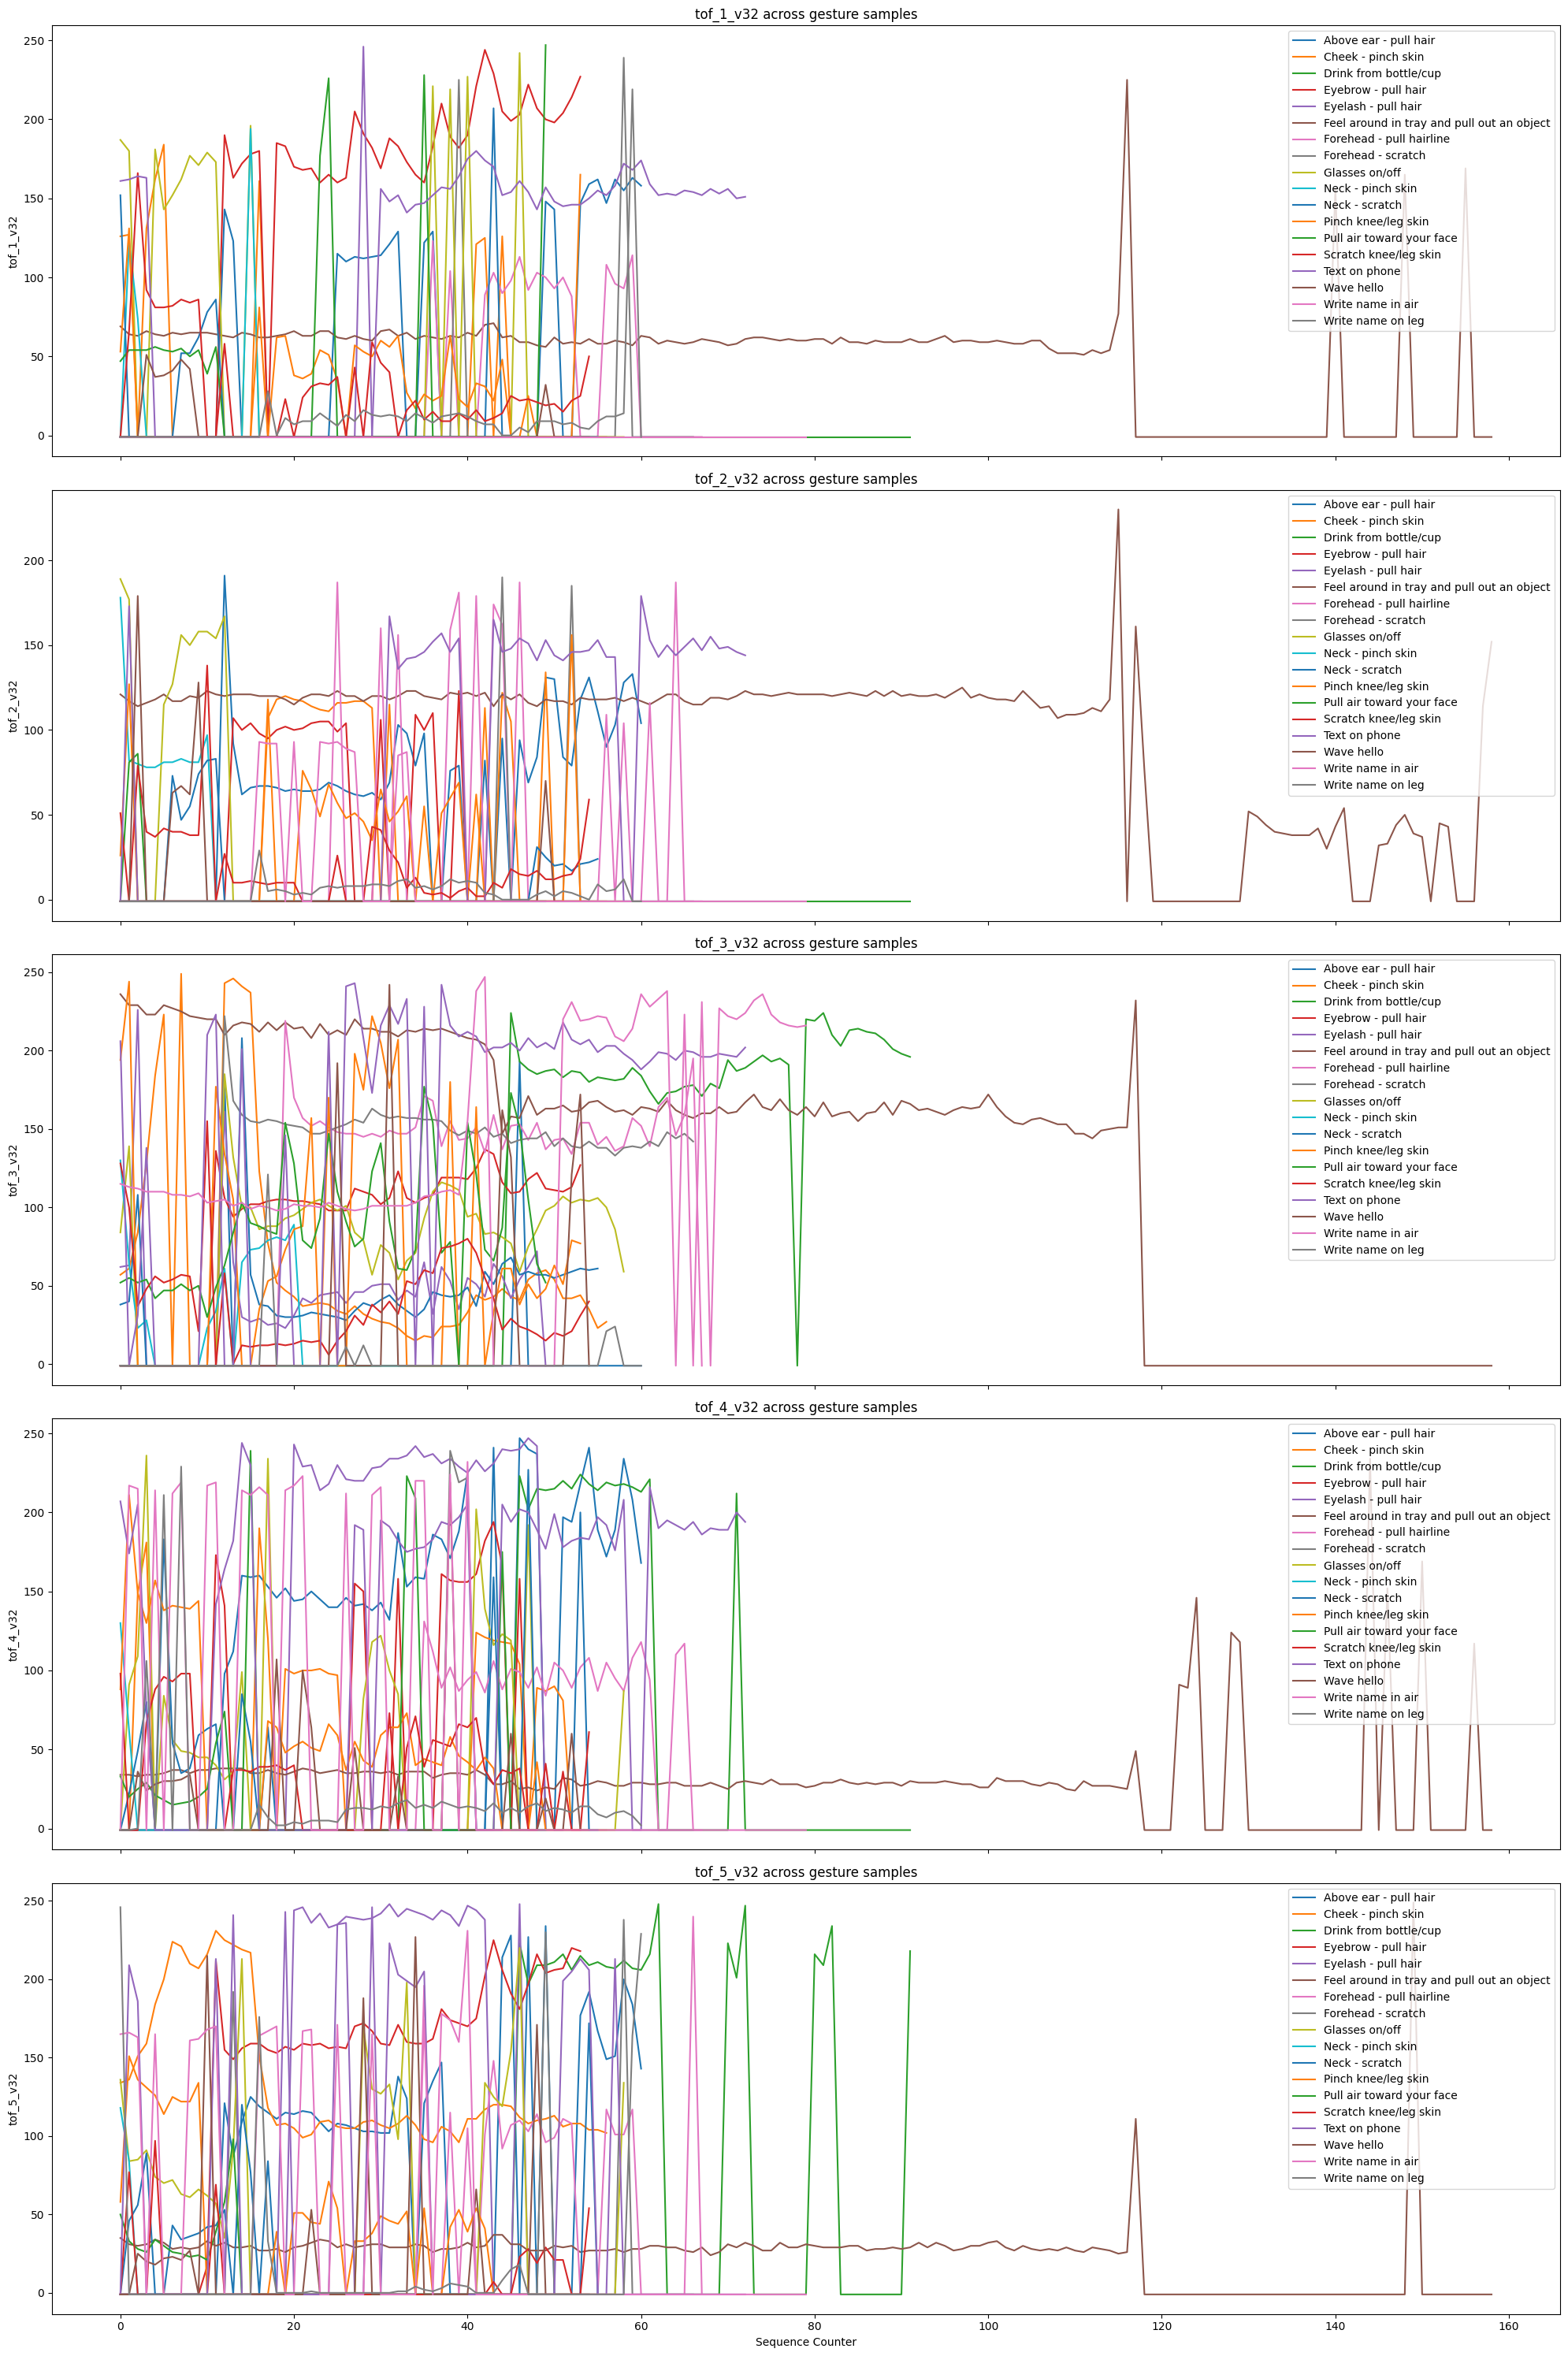

In [10]:
# Select representative ToF pixel (center pixel v32)
tof_features = [f'tof_{i}_v32' for i in range(1, 6)]

# Create subplots for each selected ToF feature
fig, axes = plt.subplots(len(tof_features), 1, figsize=(20, 6 * len(tof_features)), sharex=True)

for i, feature in enumerate(tof_features):
    ax = axes[i]
    for gesture, seq_id in gesture_ids.items():
        seq_data = train[train['sequence_id'] == seq_id]
        sns.lineplot(data=seq_data, x='sequence_counter', y=feature, label=gesture, ax=ax)
    ax.set_title(f'{feature} across gesture samples')
    ax.set_ylabel(feature)
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Sequence Counter')
plt.tight_layout()
plt.show()


In [11]:
demo = pd.read_csv('./cmi-detect-behavior-with-sensor-data/train_demographics.csv')
print(demo.describe())
print(demo['sex'].value_counts())


       adult_child        age        sex  handedness   height_cm  \
count    81.000000  81.000000  81.000000   81.000000   81.000000   
mean      0.518519  21.814815   0.617284    0.876543  167.993827   
std       0.502770  10.289693   0.489078    0.331010   10.605863   
min       0.000000  10.000000   0.000000    0.000000  135.000000   
25%       0.000000  13.000000   0.000000    1.000000  163.000000   
50%       1.000000  22.000000   1.000000    1.000000  170.000000   
75%       1.000000  27.000000   1.000000    1.000000  174.000000   
max       1.000000  53.000000   1.000000    1.000000  190.500000   

       shoulder_to_wrist_cm  elbow_to_wrist_cm  
count             81.000000          81.000000  
mean              51.580247          25.469136  
std                4.888415           3.025254  
min               41.000000          18.000000  
25%               49.000000          24.000000  
50%               52.000000          25.000000  
75%               55.000000          27.0000